In [209]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

# EDA

In [210]:
df = pd.read_csv("train.csv")

In [211]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [212]:
df.shape

(1460, 81)

In [213]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [214]:
top_null = df.isnull().sum().sort_values(ascending=False)
print(top_null)
print(type(top_null))

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64
<class 'pandas.core.series.Series'>


In [215]:
top_null = df.isnull().sum().sort_values(ascending=False).head(10)
print(top_null)
print(top_null.index)
print(type(top_null.index))
print(top_null.index.tolist())
print(type(top_null.index.tolist()))
top_null_array = top_null.index.tolist()

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
dtype: int64
Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>
['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType']
<class 'list'>


# Null with Price

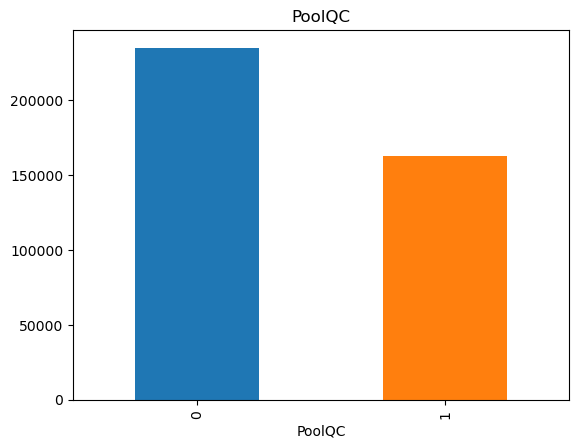

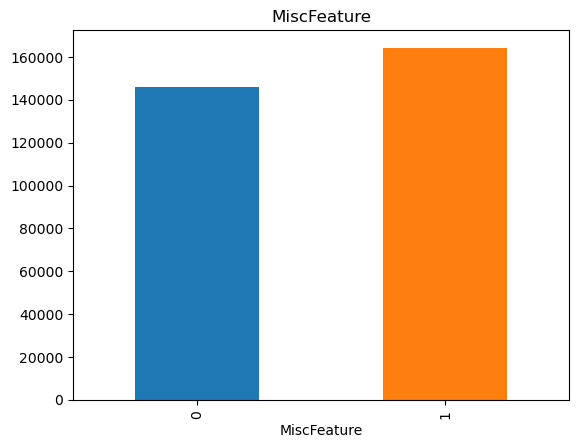

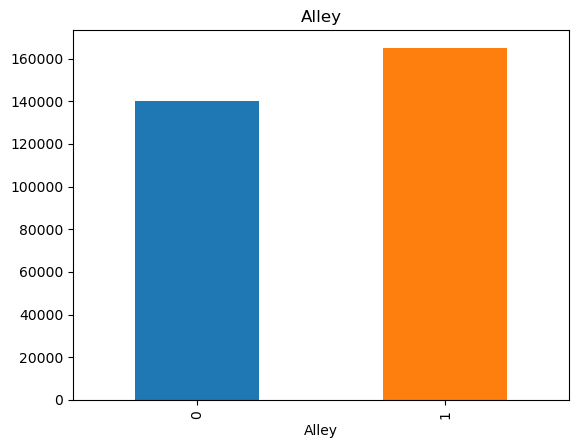

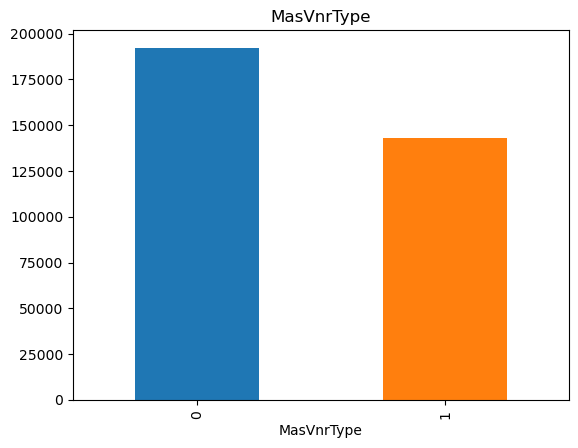

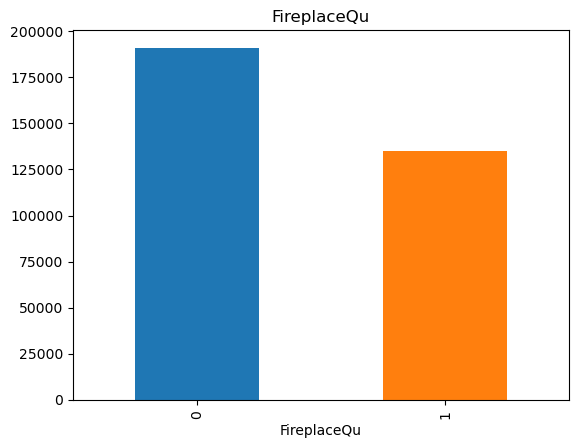

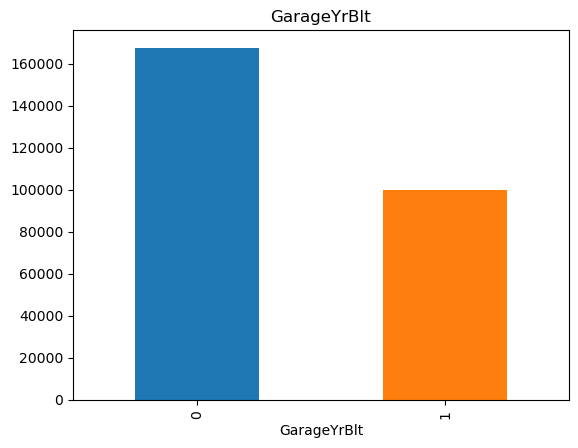

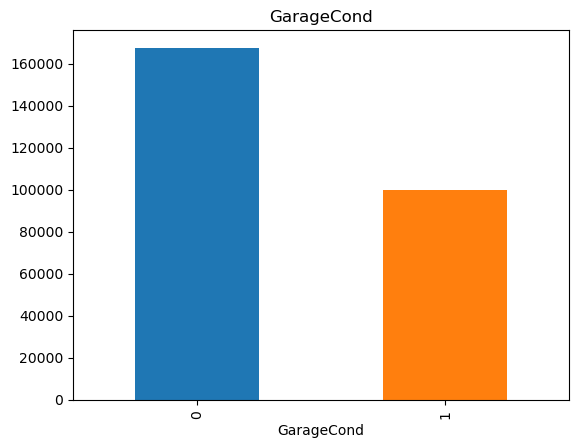

In [249]:
for col in top_null_array:
    df1 = df.copy()
    #print(df1[col])
    # 1 is null
    # 0 is not null
    df1[col] = np.where(df1[col].isnull(),1,0)
    df1.groupby(col)['SalePrice'].median().plot.bar(color=plt.cm.tab10(range(len(group_median))))
    plt.title(col)
    plt.show()


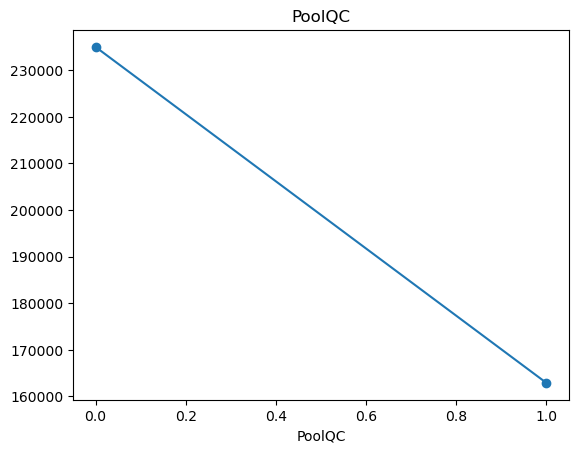

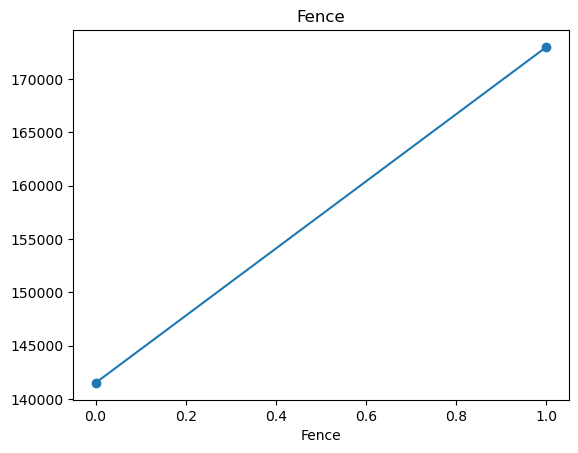

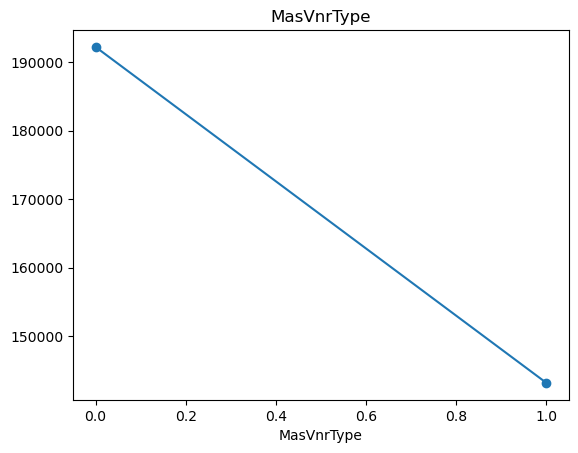

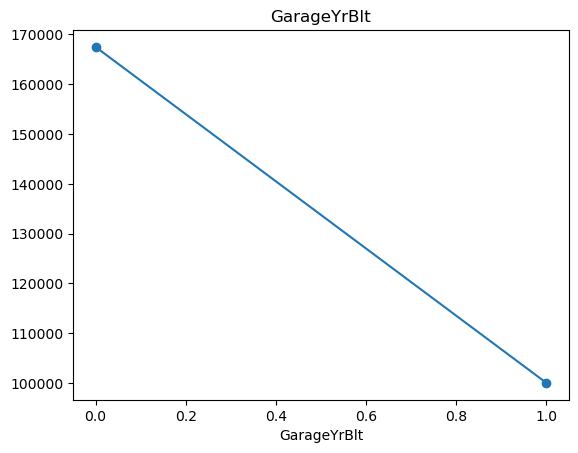

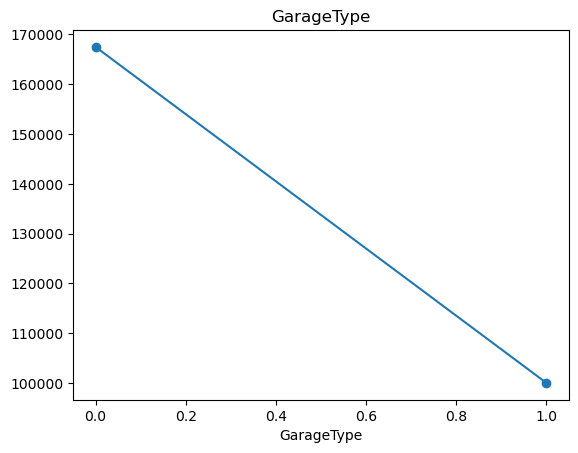

In [217]:
for col in top_null_array:
    df1 = df.copy()
    #print(df1[col])
    # 1 is null
    # 0 is not null
    df1[col] = np.where(df1[col].isnull(),1,0)
    df1.groupby(col)['SalePrice'].median().plot(marker='o', linestyle='-')
    plt.title(col)
    plt.show()


In [218]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [219]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [220]:
df2 = df1.drop('Id',axis=1)

In [221]:
df2.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

# Numeric

In [222]:
numeric_col = []

for col in df2.columns:
    if df2[col].dtypes != 'O':
        numeric_col.append(col) 
        
print(len(numeric_col))
print(numeric_col)
print(df2[numeric_col].head())

38
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemod

# Year

In [223]:
year_col = []

for col in numeric_col:
    if 'Year' in col or "Yr" in col:
        year_col.append(col) 
        
print(len(year_col))
print(year_col)
print(df2[year_col].head())

4
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
   YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008
1       1976          1976       1976.0    2007
2       2001          2002       2001.0    2008
3       1915          1970       1998.0    2006
4       2000          2000       2000.0    2008


In [224]:
plt.figure(figsize=(10, 6))
plt.scatter(df2['YrSold'], df2['SalePrice'], alpha=0.5)
plt.title('Year Sold vs Sales Price')
plt.xlabel('Year Sold')
plt.ylabel('Sales Price')
plt.grid(True)
plt.show()


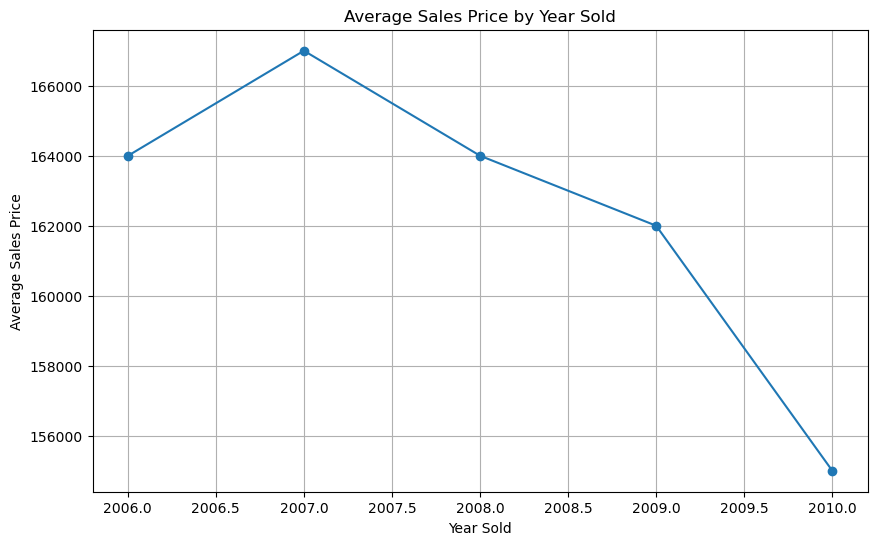

In [225]:
#median because of outliers
df1 = df2.copy()
yearly_sales_price = df2.groupby('YrSold')['SalePrice'].median()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales_price.index, yearly_sales_price.values, marker='o', linestyle='-')
plt.title('Average Sales Price by Year Sold')
plt.xlabel('Year Sold')
plt.ylabel('Average Sales Price')
plt.grid(True)
plt.show()

In [226]:
df1 = df2.copy()
yearly_sales_price = df1.groupby('YearBuilt')['SalePrice'].median()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales_price.index, yearly_sales_price.values, marker='o', linestyle='-')
plt.title('Average Sales Price by Year Sold')
plt.xlabel('Year Sold')
plt.ylabel('Average Sales Price')
plt.grid(True)
plt.show()

In [227]:
df2['MSSubClass'].unique

<bound method Series.unique of 0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: int64>

In [228]:
df2['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

# Discrete under Numeric

In [229]:
discrete_col = []

for col in numeric_col:
    if len(df2[col].unique()) < 25 and col not in year_col:
        discrete_col.append(col) 
        
print(len(discrete_col))
print(discrete_col)
print(df2[discrete_col].head())

18
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']
   MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1           

In [230]:
df2.shape

(1460, 80)

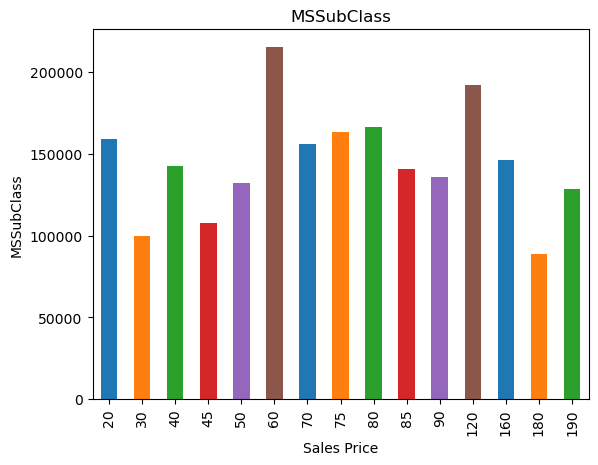

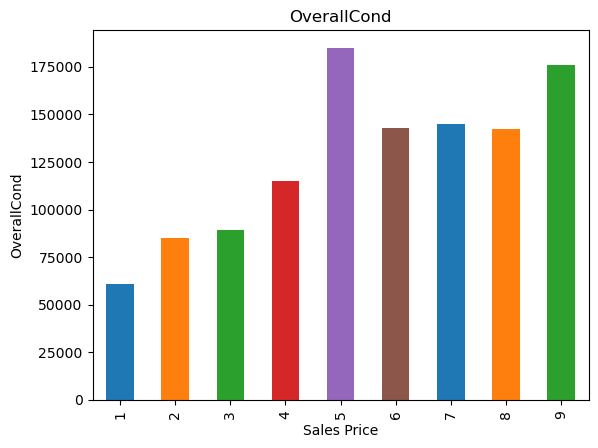

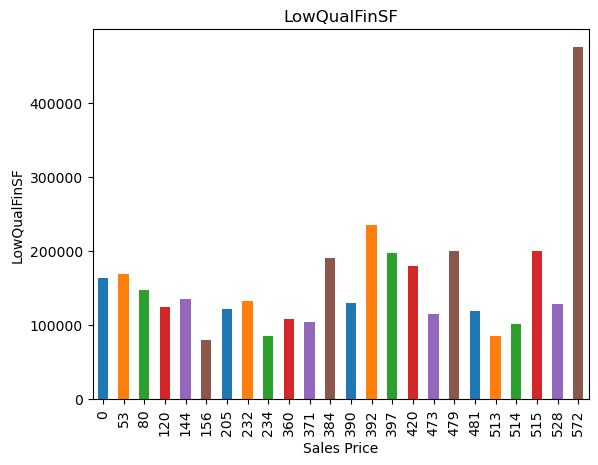

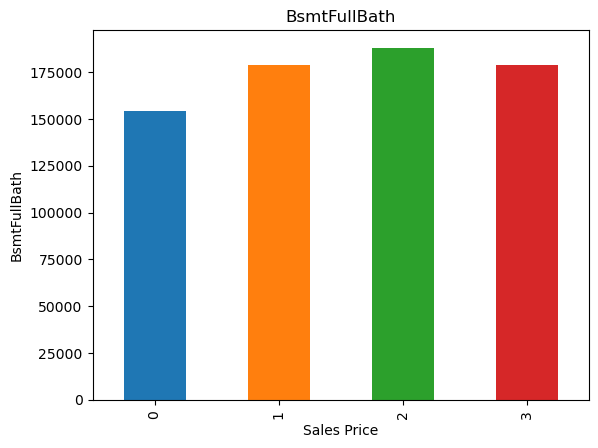

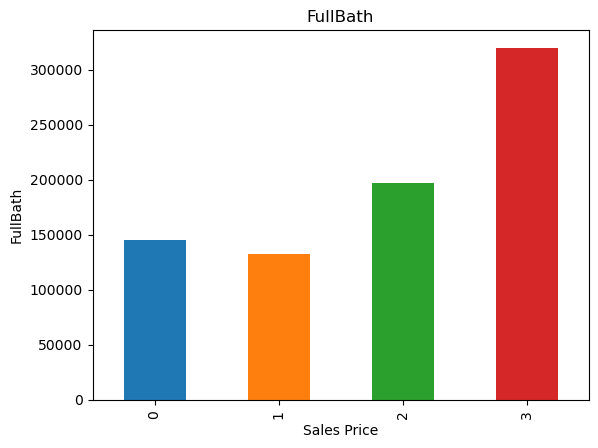

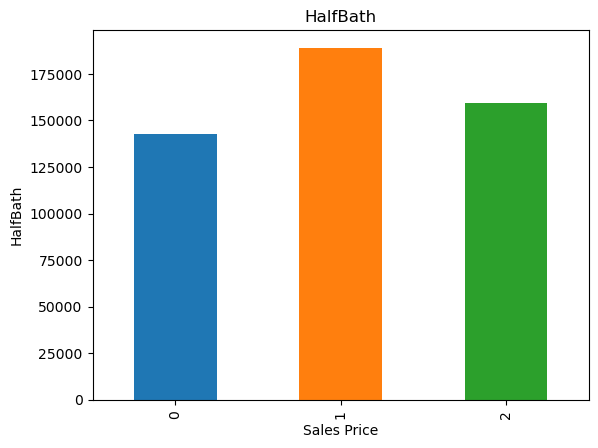

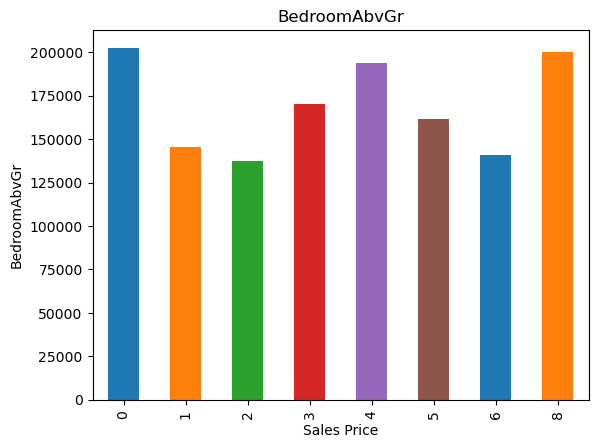

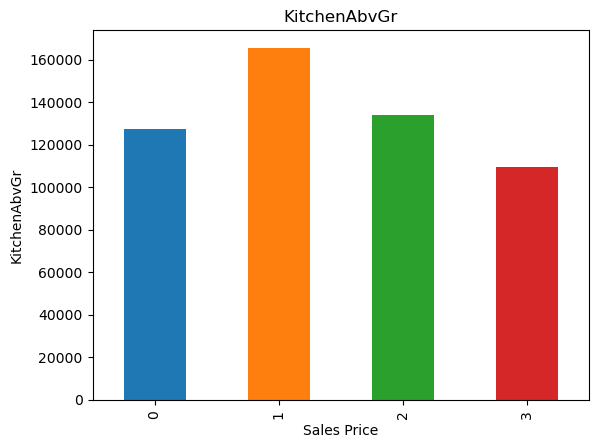

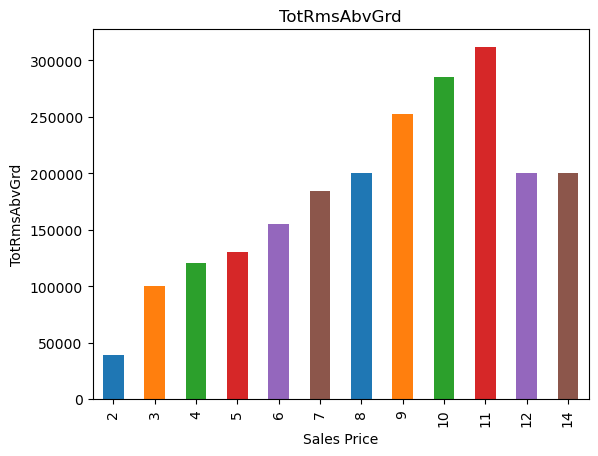

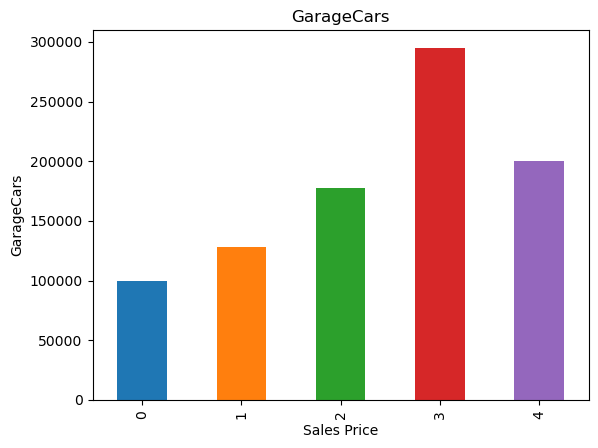

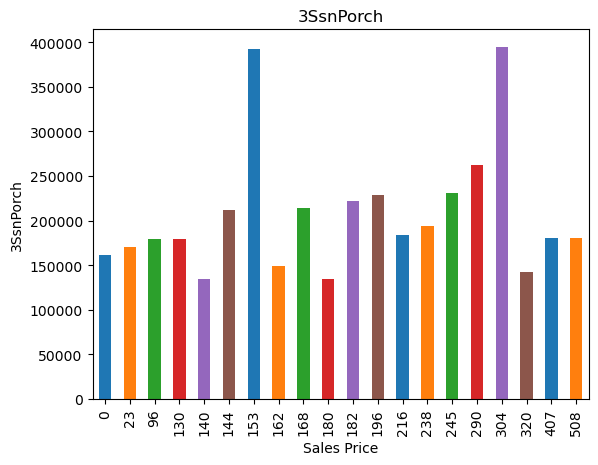

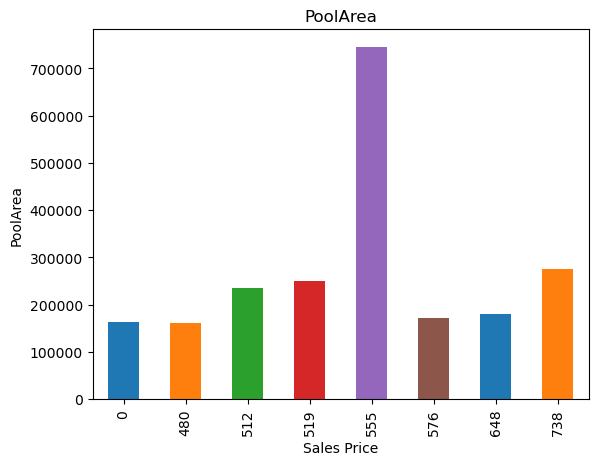

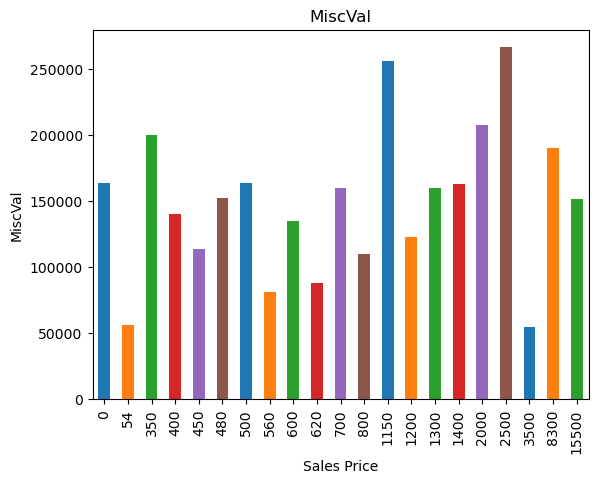

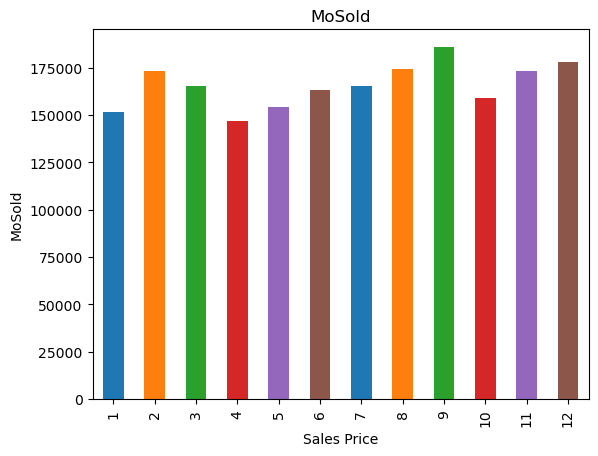

In [248]:
for col in discrete_col:
    df1 = df2.copy()
    df1.groupby(col)['SalePrice'].median().plot.bar(color=plt.cm.tab10(range(len(group_median))))
    plt.xlabel('Sales Price')
    plt.ylabel(col)
    plt.title(col)
    plt.show()

# Continuous under Numeric

In [232]:
conti_col = []

for col in numeric_col:
    if len(df2[col].unique()) > 25 and col not in year_col:
        conti_col.append(col) 
        
print(len(conti_col))
print(conti_col)
print(df2[conti_col].head())

16
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
   LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856       856       854       1710         548           0   
1         1262      1262         0       1262         460         298   
2          920       920       866       1786         608           0   
3          756       961       756    

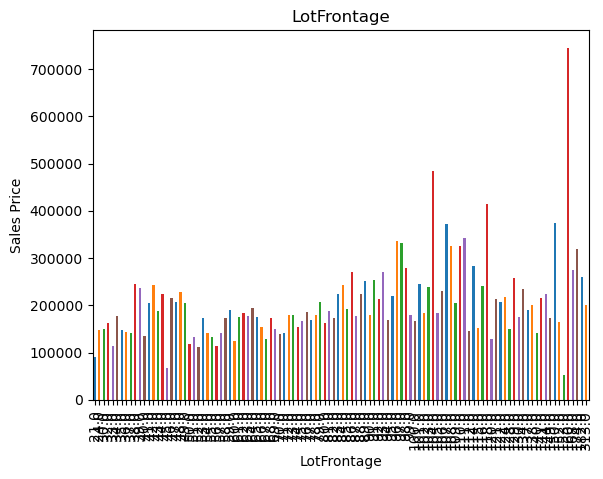

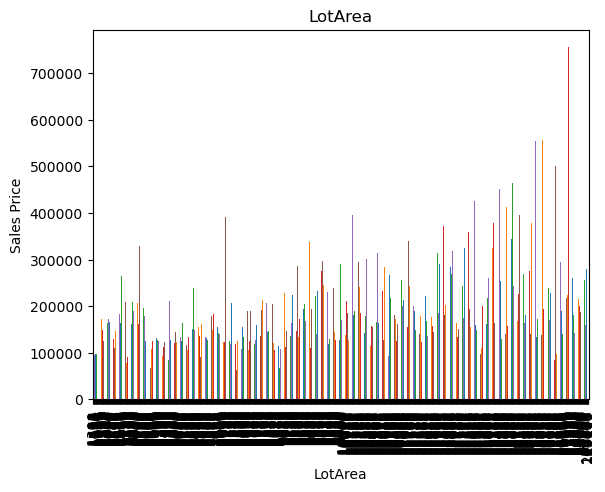

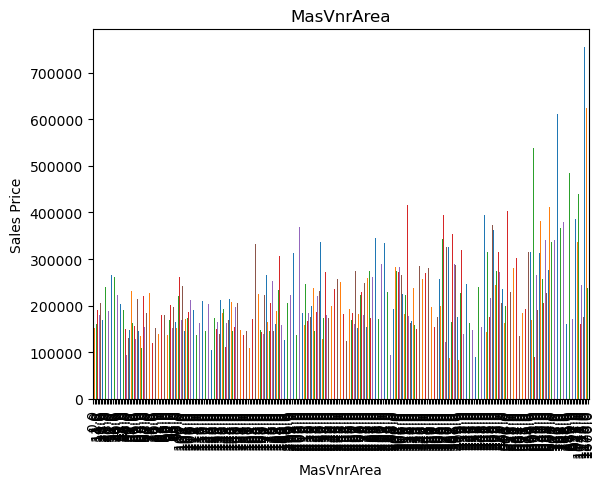

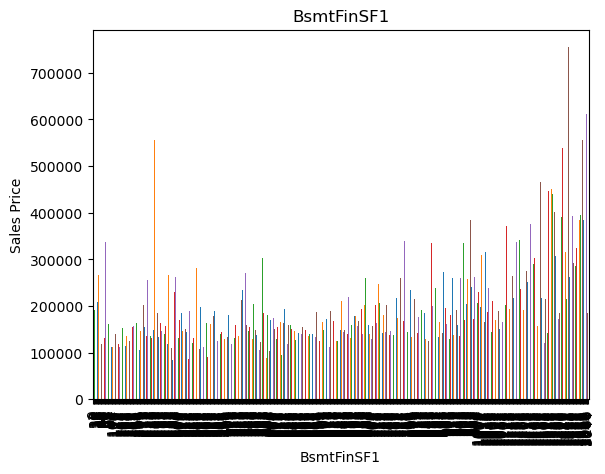

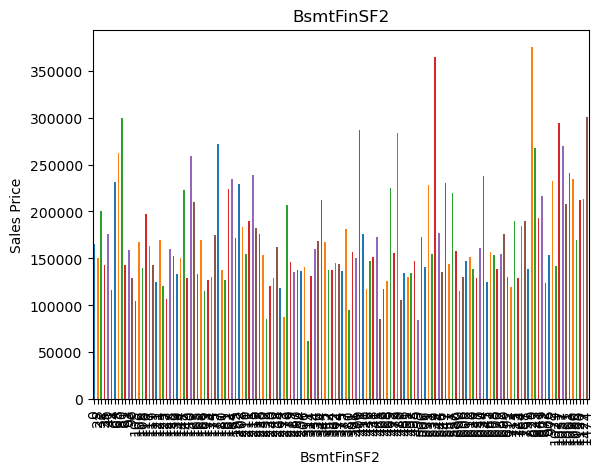

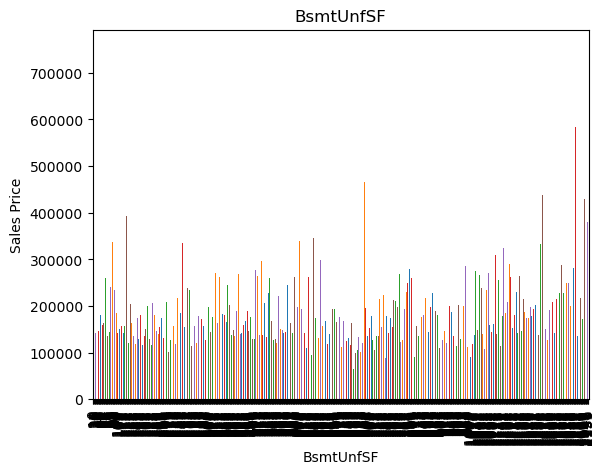

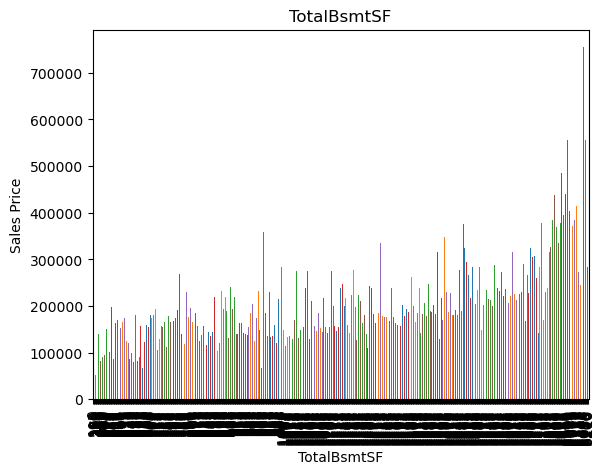

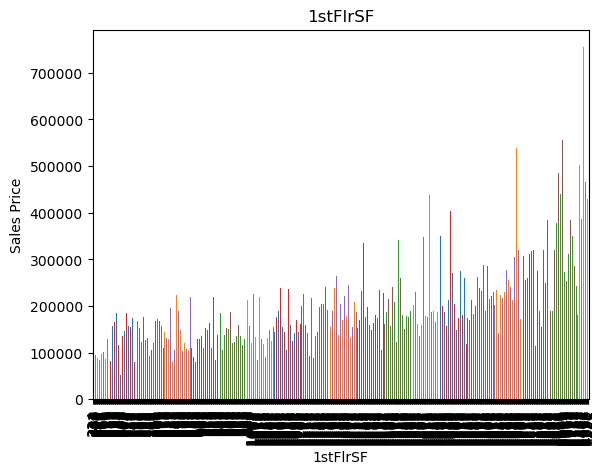

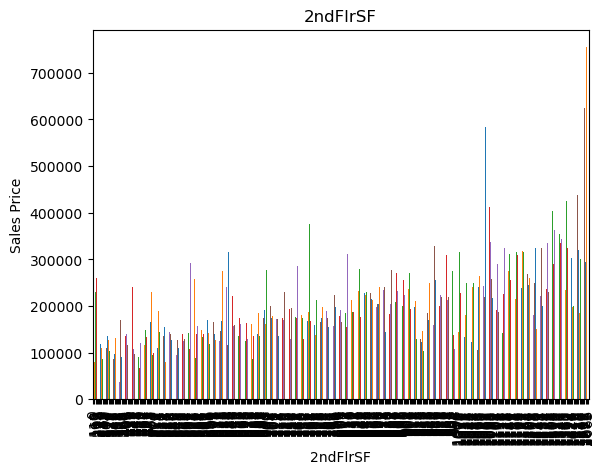

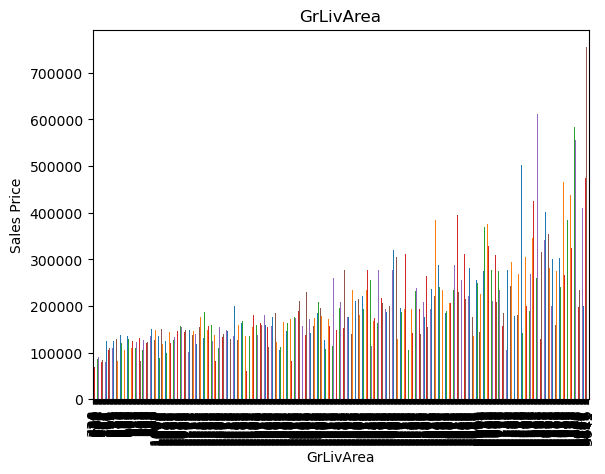

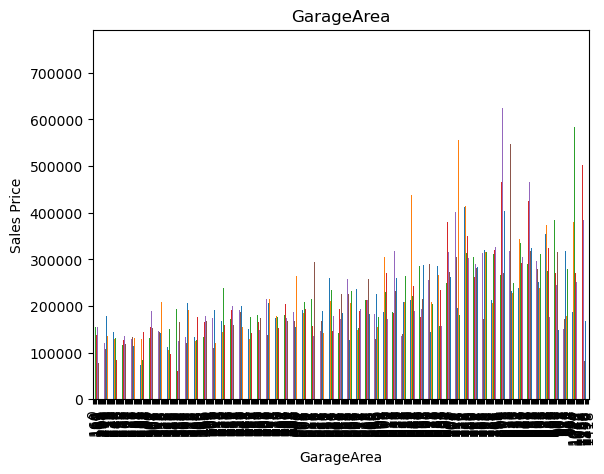

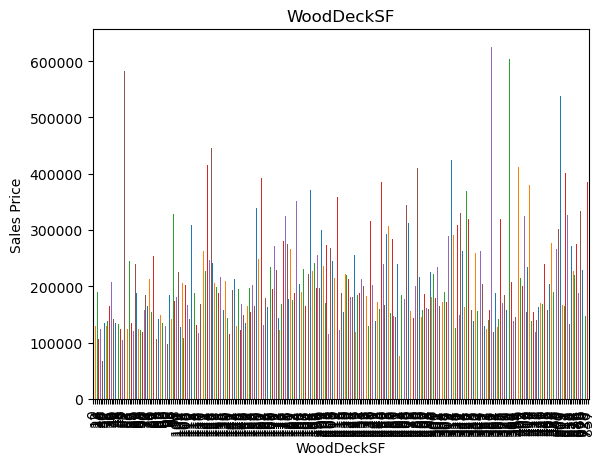

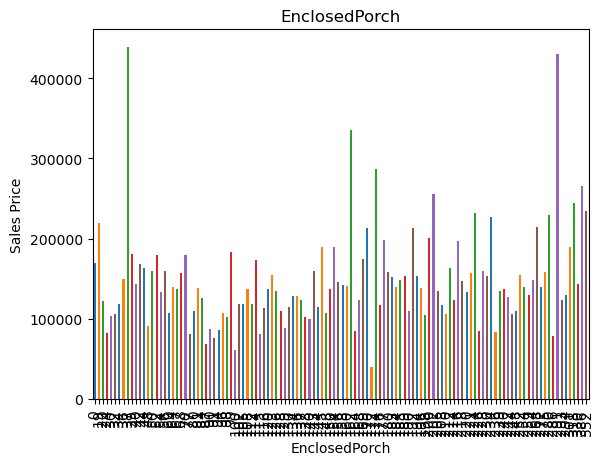

In [250]:
#no bar
#its continuos

for col in conti_col:
    df1 = df2.copy()
    df1.groupby(col)['SalePrice'].median().plot.bar(color=plt.cm.tab10(range(len(group_median))))
    plt.ylabel('Sales Price')
    plt.xlabel(col)
    plt.title(col)
    plt.show()

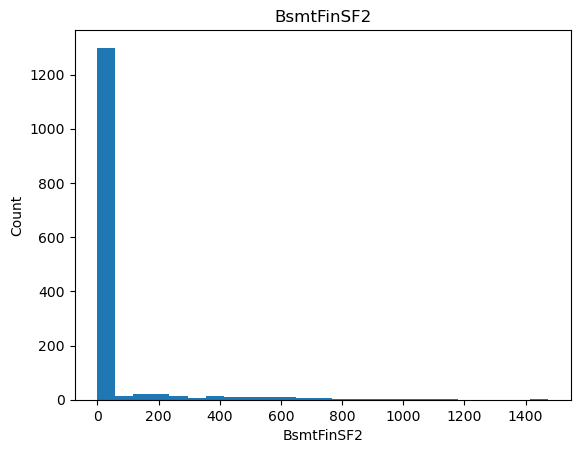

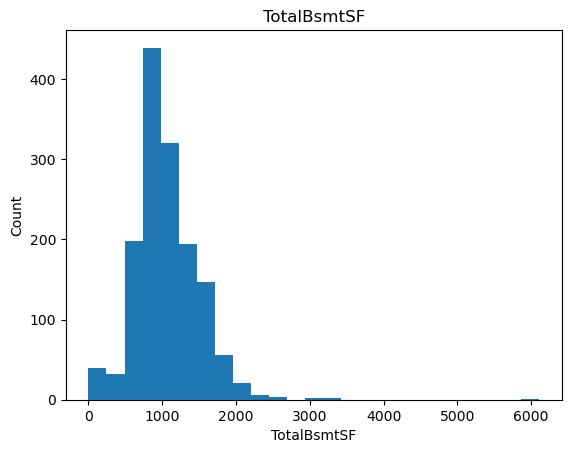

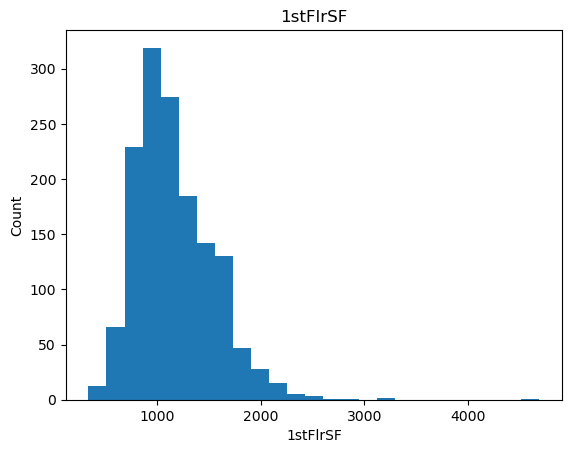

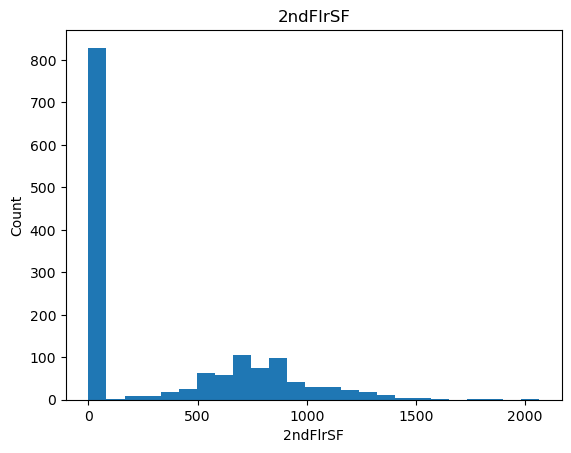

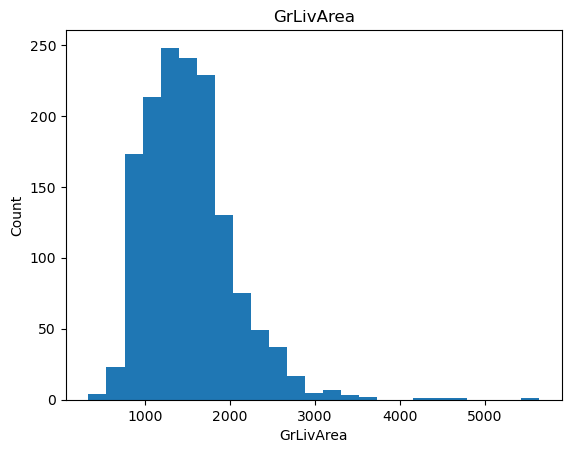

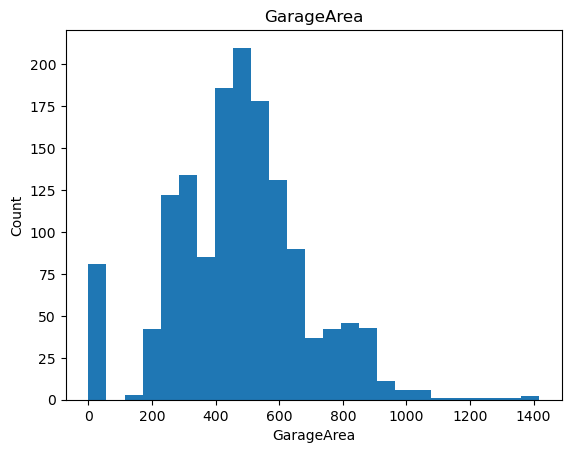

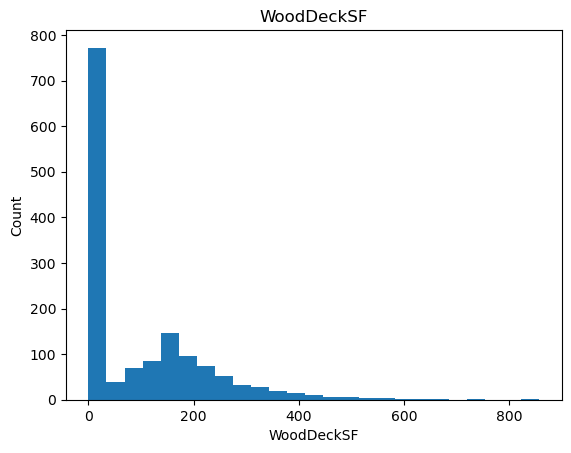

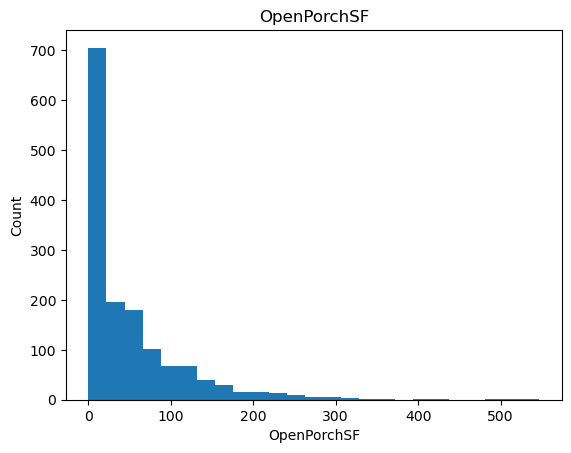

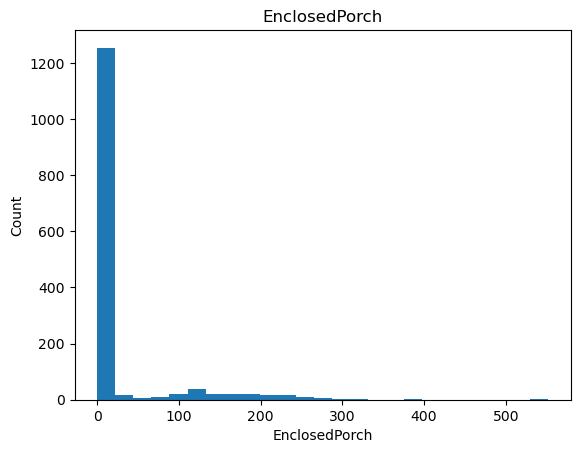

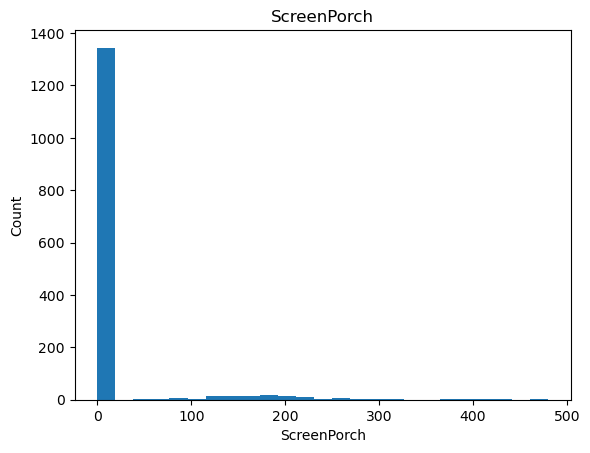

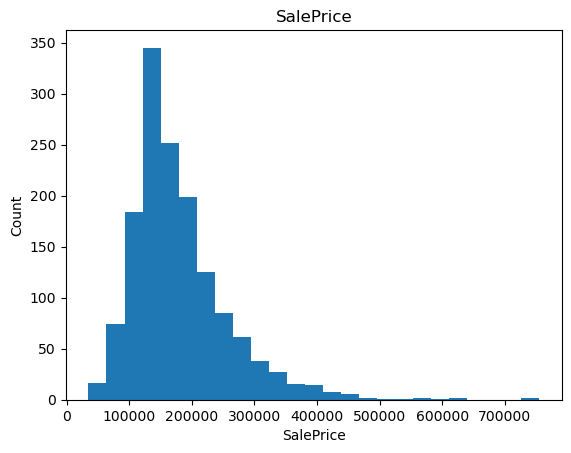

In [247]:
for col in conti_col:
    df1 = df2.copy()
    plt.hist(df1[col],bins=25)
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.title(col)
    plt.show()

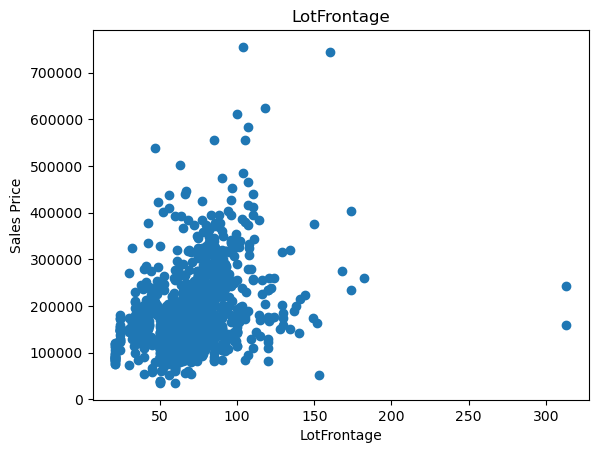

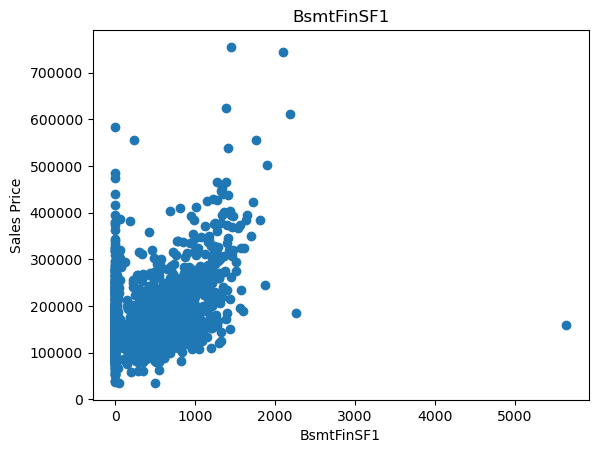

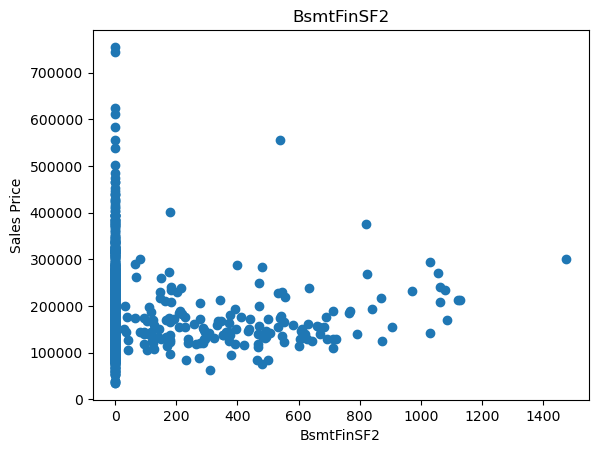

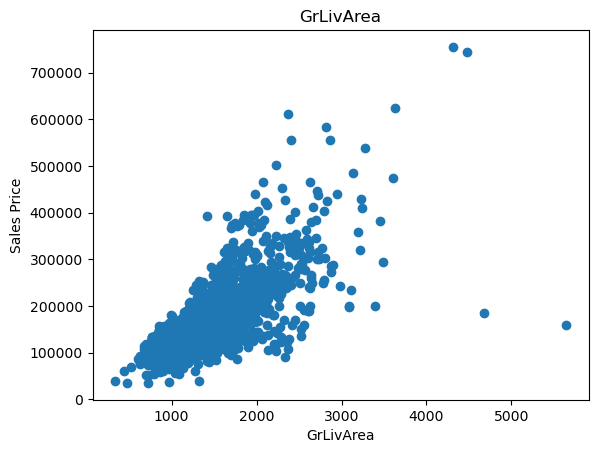

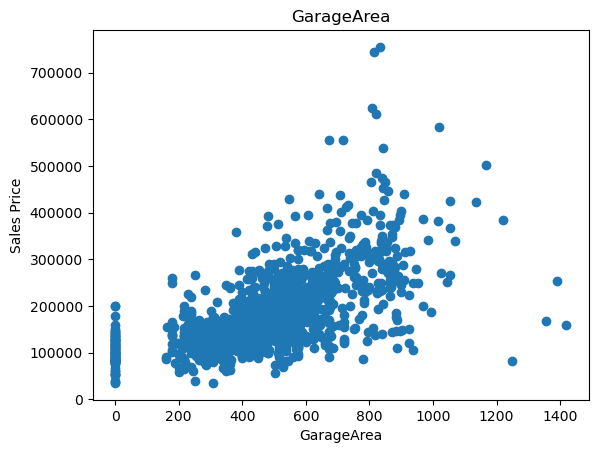

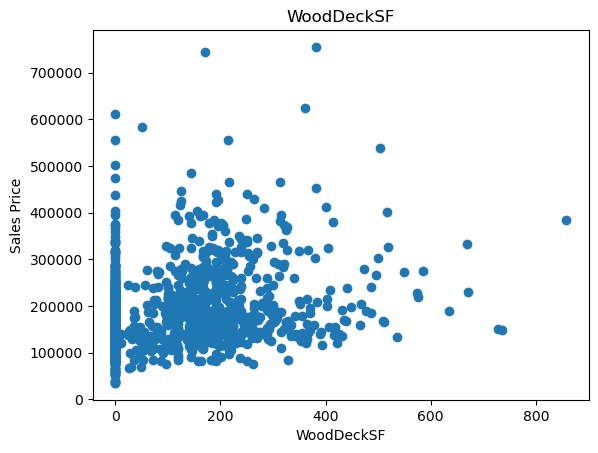

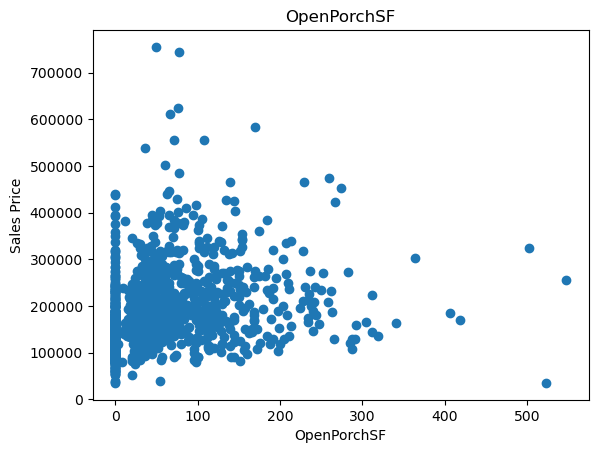

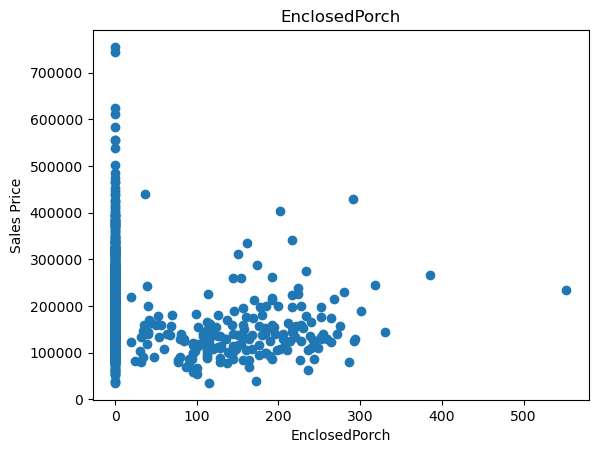

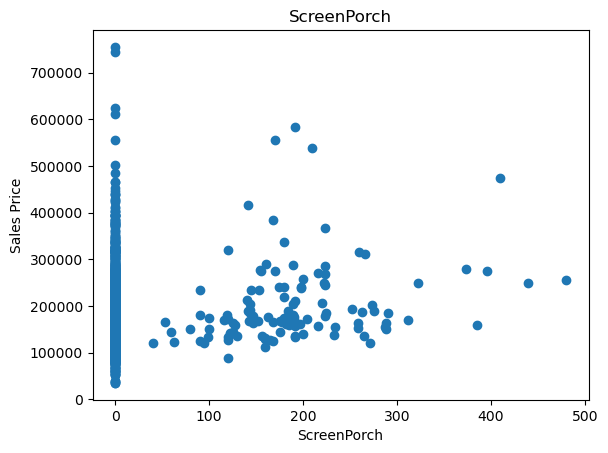

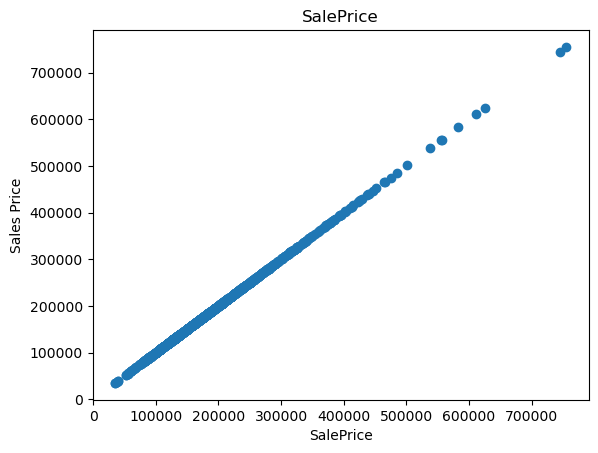

In [235]:
for col in conti_col:
    df1 = df2.copy()
    plt.scatter(df1[col],df1['SalePrice'])
    plt.ylabel('Sales Price')
    plt.xlabel(col)
    plt.title(col)
    plt.show()

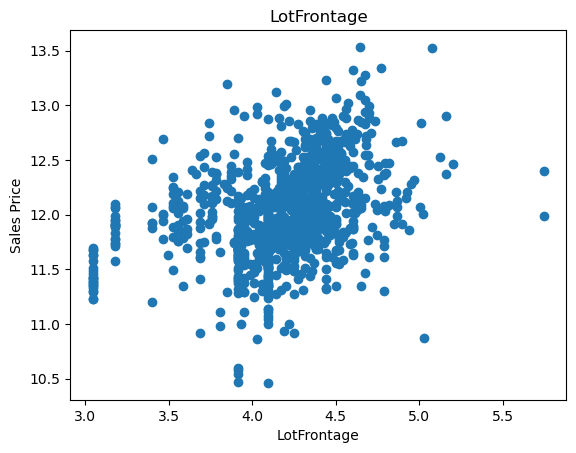

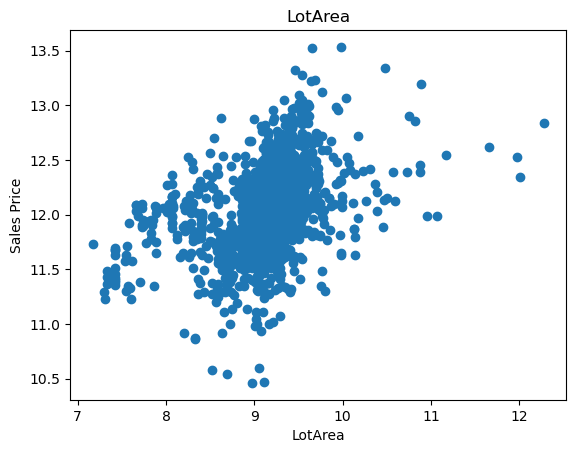

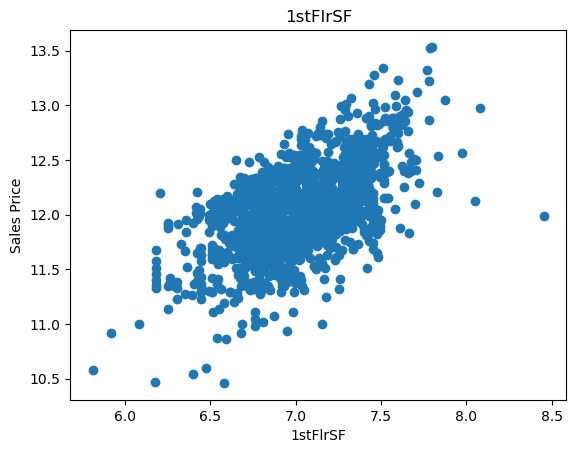

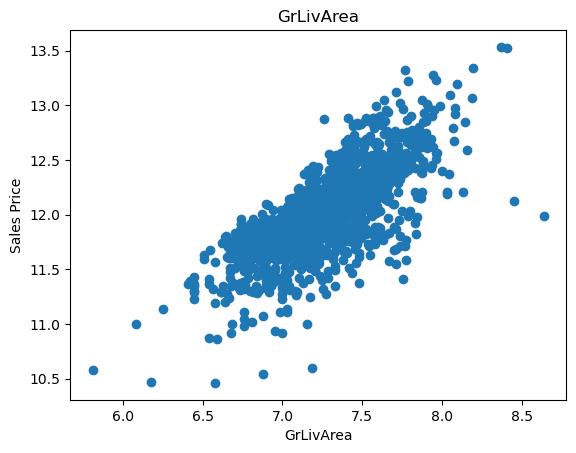

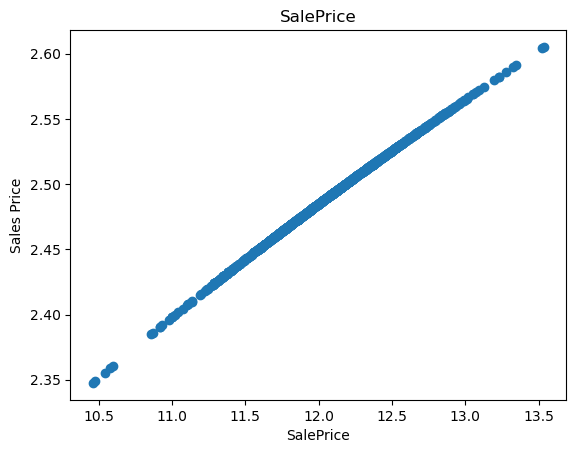

In [236]:
for col in conti_col:
    df1 = df2.copy()
    if 0 in df1[col].unique():
        pass
    else:
        df1[col] = np.log(df1[col])
        plt.scatter(df1[col],np.log(df1['SalePrice']))
        plt.ylabel('Sales Price')
        plt.xlabel(col)
        plt.title(col)
        plt.show()

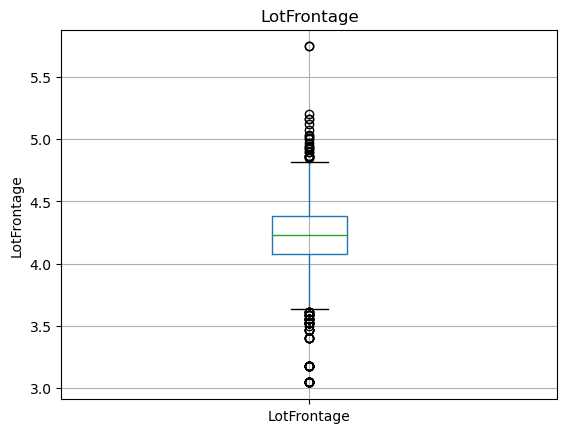

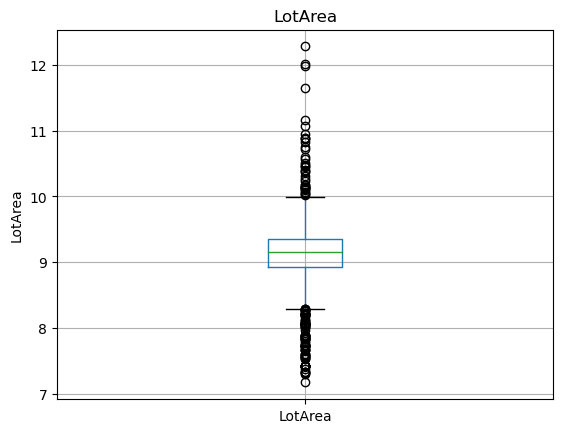

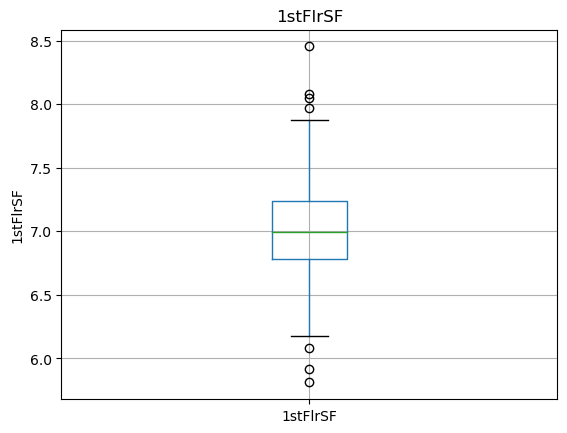

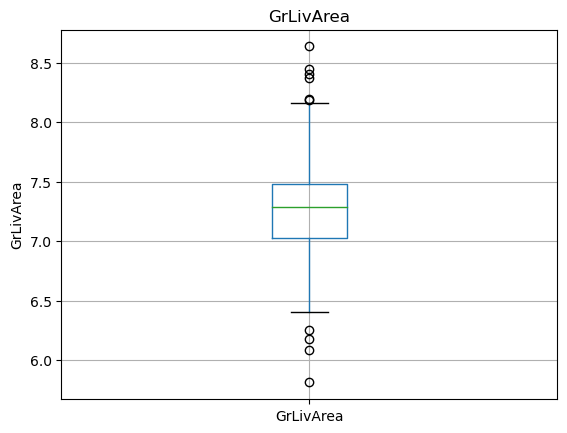

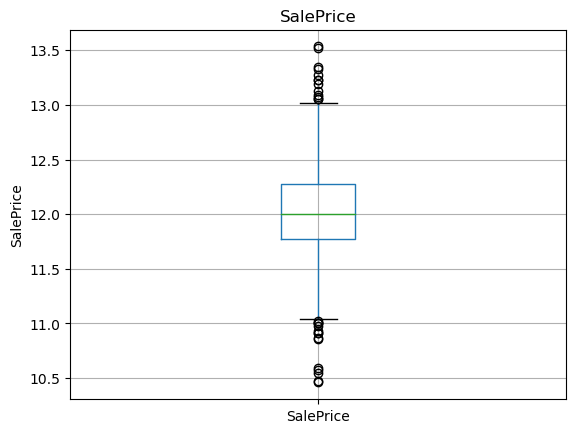

In [237]:
for col in conti_col:
    df1 = df2.copy()
    if 0 in df1[col].unique():
        pass
    else:
        df1[col] = np.log(df1[col])
        df1.boxplot(column=col)
        plt.ylabel(col)
        plt.title(col)
        plt.show()

# Categorical

In [238]:
categorical_col =[]
for col in df.columns:
    if df[col].dtypes == 'O':
        categorical_col.append(col)
        
print(len(categorical_col))
print(categorical_col)


43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [239]:
df2[categorical_col].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd        NaN        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng        NaN        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu  GarageType  \
0          Y      SBrkr          Gd        Typ         NaN           0   
1          Y      SBrkr          TA        Typ          TA           0   
2          Y      SBrkr          Gd        Typ          TA           0   
3          Y      SBrkr          Gd        Typ          Gd           0   
4          Y      SBrkr          Gd        Typ          TA           0   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [240]:
for col in categorical_col:
    print("Column name",col,"their unique values",df[col].unique())
    print("length is",len(df[col].unique()))
    

Column name MSZoning their unique values ['RL' 'RM' 'C (all)' 'FV' 'RH']
length is 5
Column name Street their unique values ['Pave' 'Grvl']
length is 2
Column name Alley their unique values [nan 'Grvl' 'Pave']
length is 3
Column name LotShape their unique values ['Reg' 'IR1' 'IR2' 'IR3']
length is 4
Column name LandContour their unique values ['Lvl' 'Bnk' 'Low' 'HLS']
length is 4
Column name Utilities their unique values ['AllPub' 'NoSeWa']
length is 2
Column name LotConfig their unique values ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
length is 5
Column name LandSlope their unique values ['Gtl' 'Mod' 'Sev']
length is 3
Column name Neighborhood their unique values ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
length is 25
Column name Condition1 their unique values ['Norm' 'Feedr' 'PosN' 'Ar

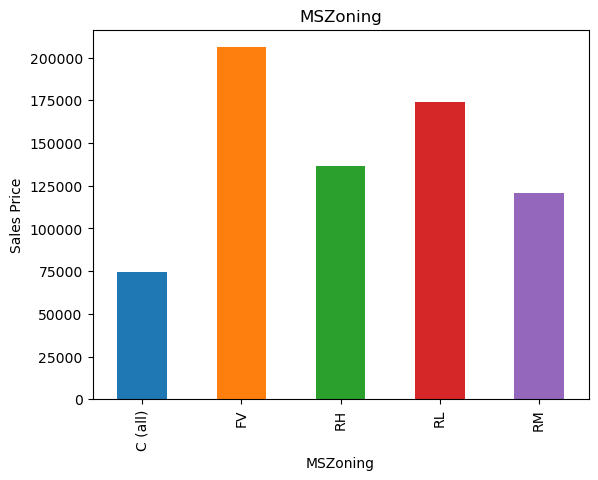

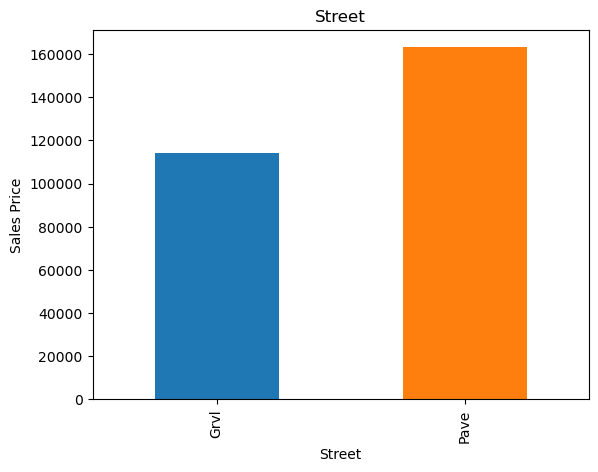

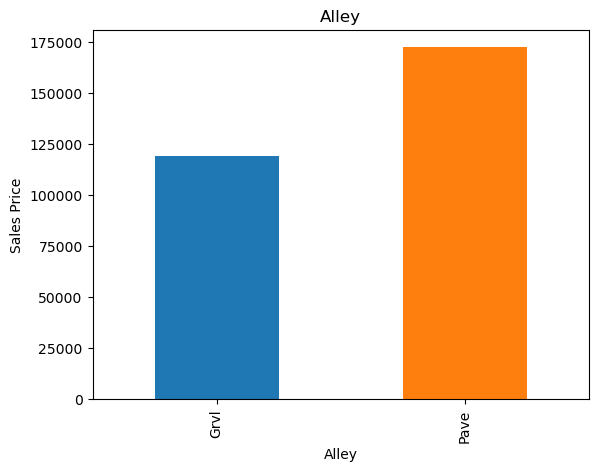

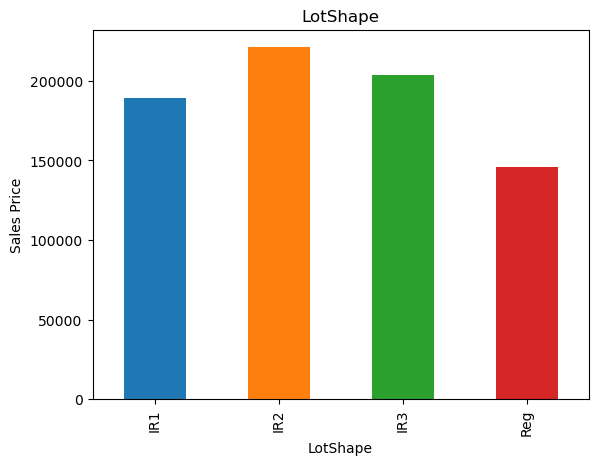

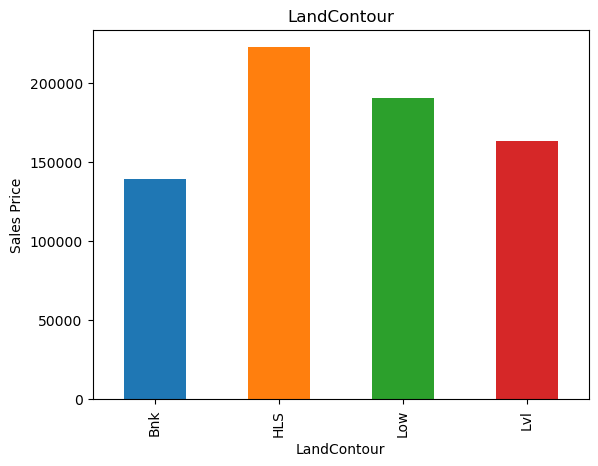

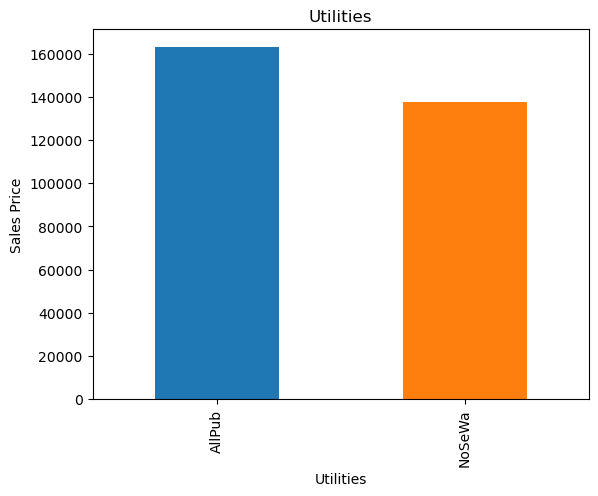

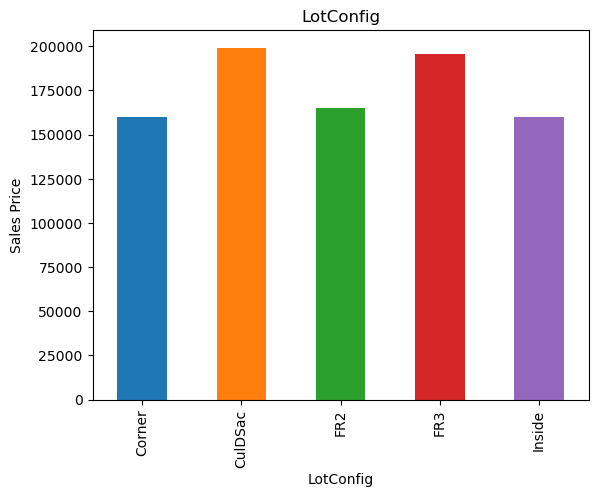

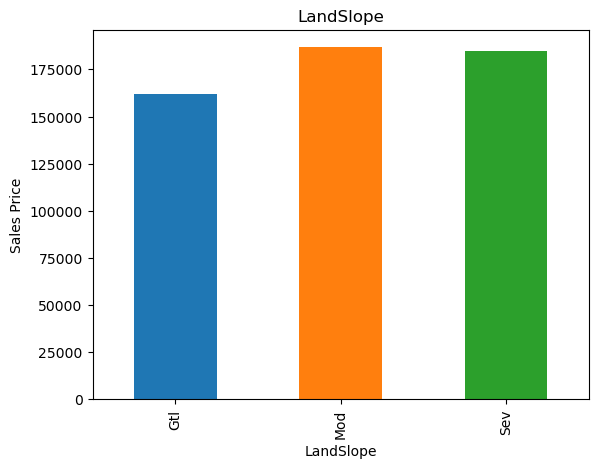

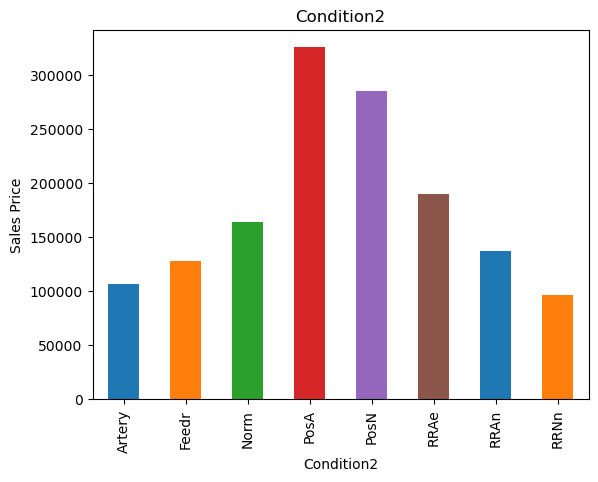

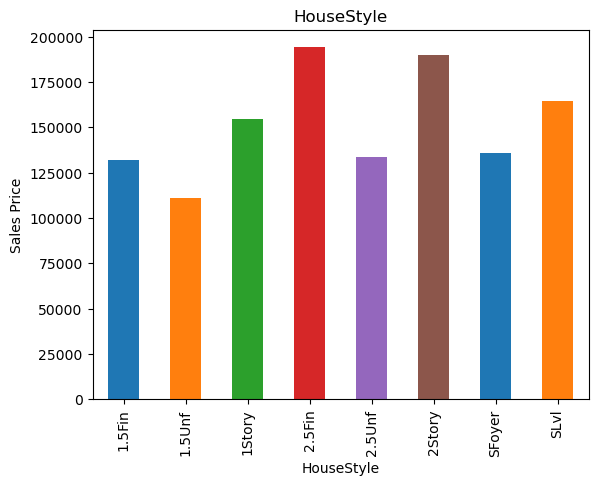

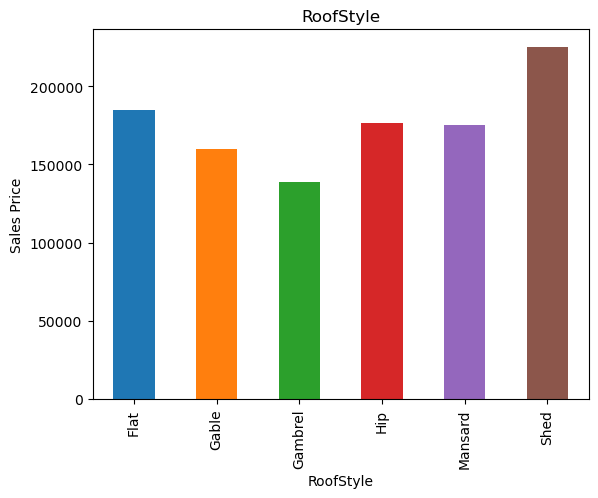

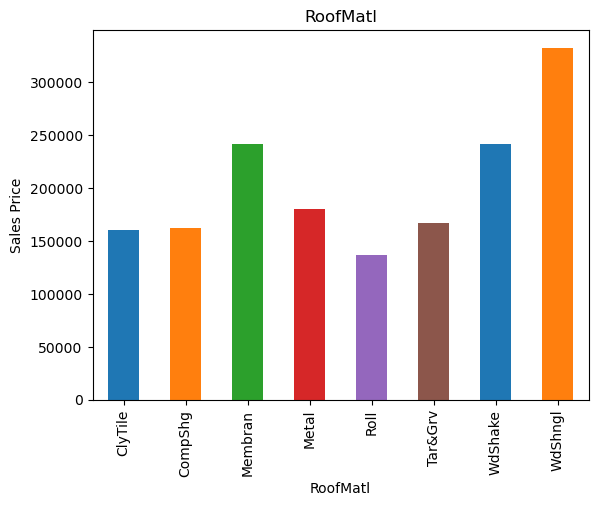

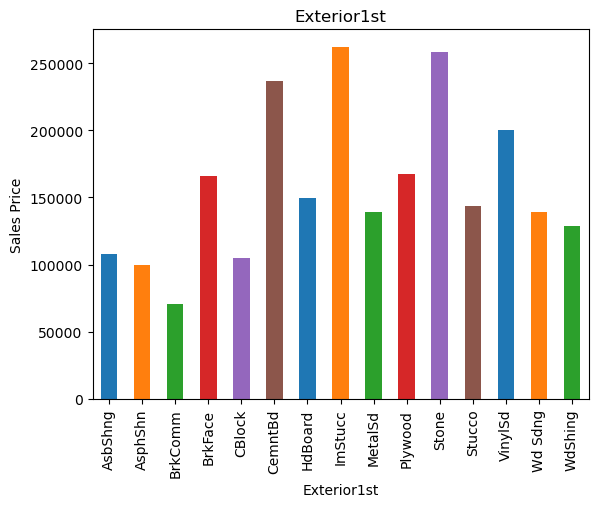

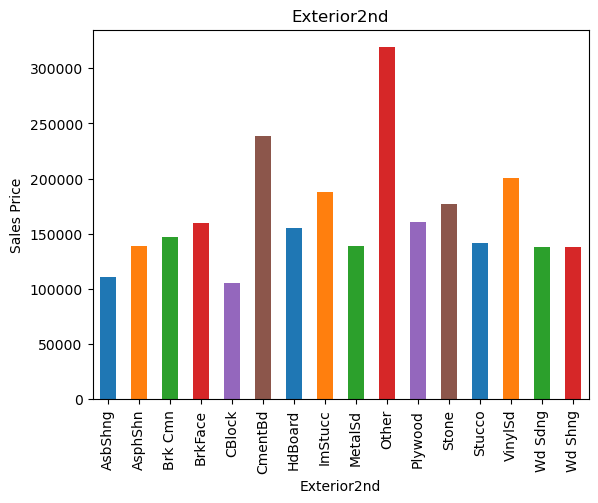

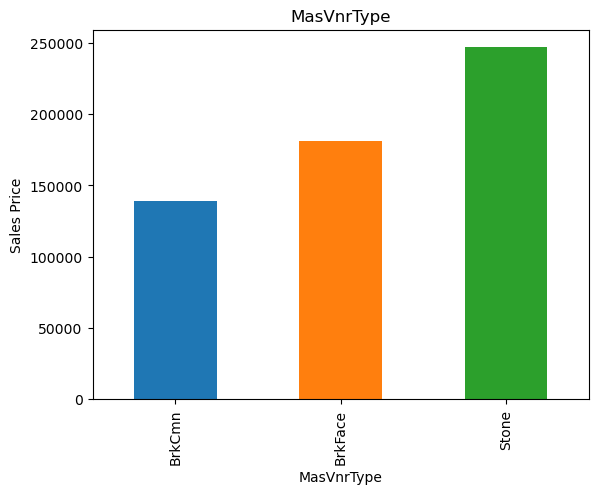

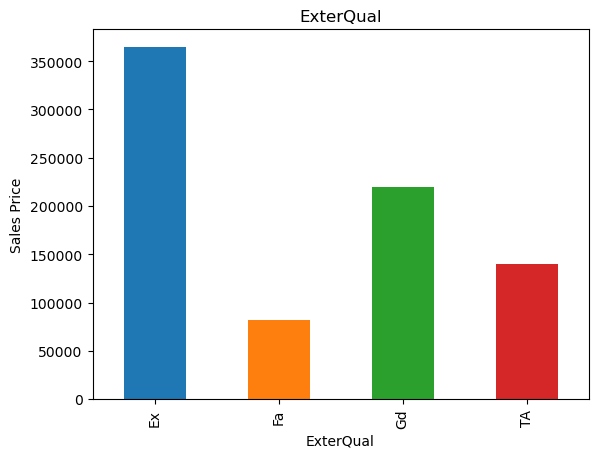

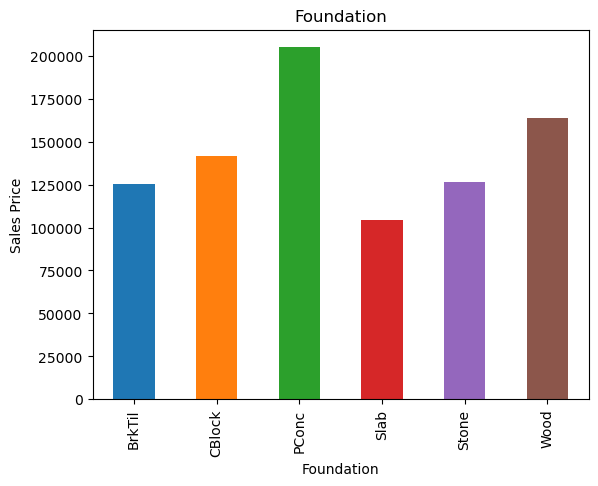

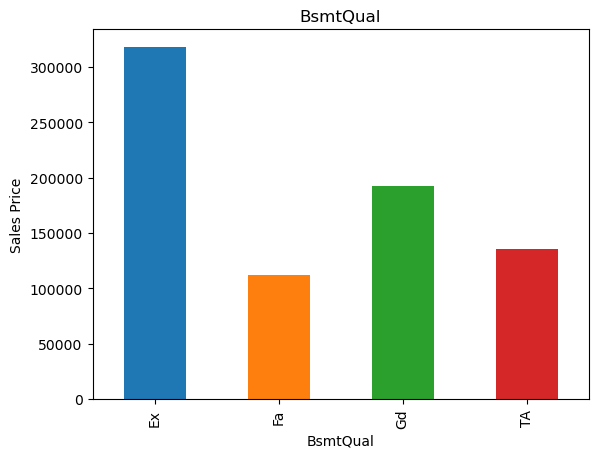

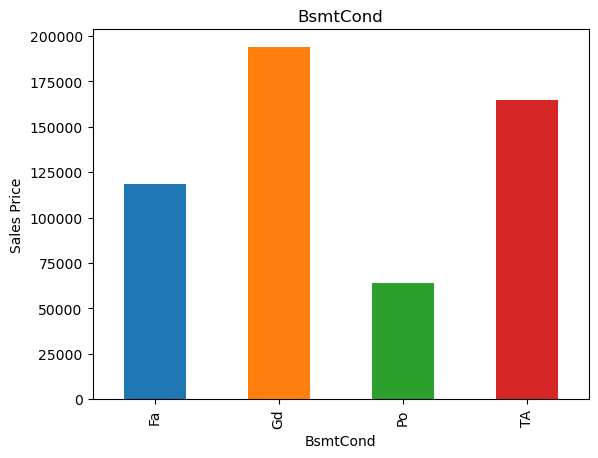

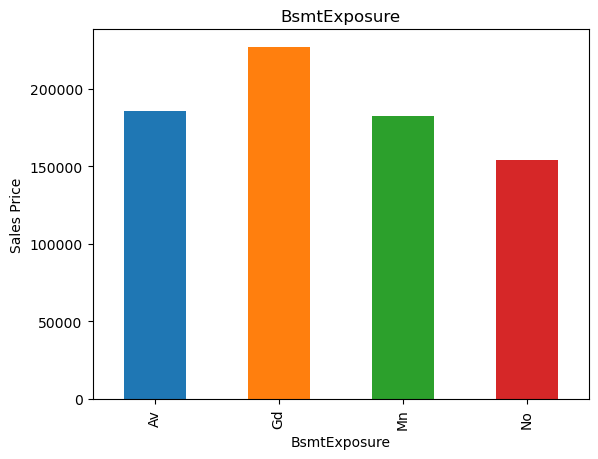

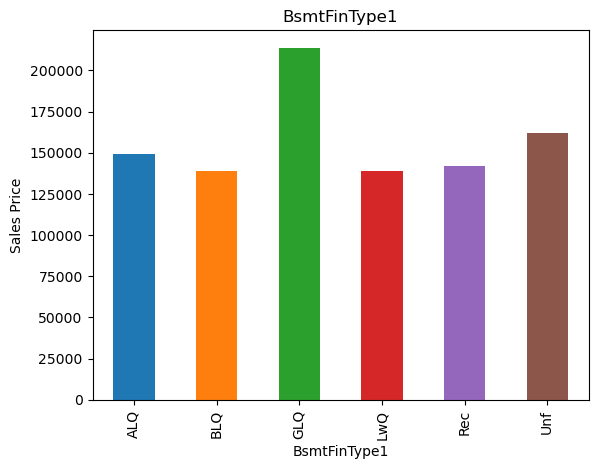

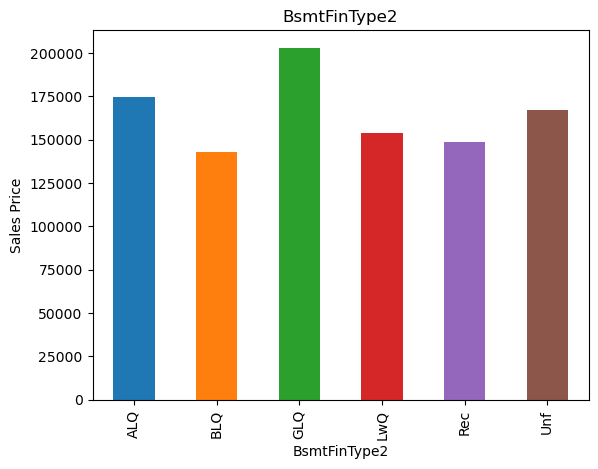

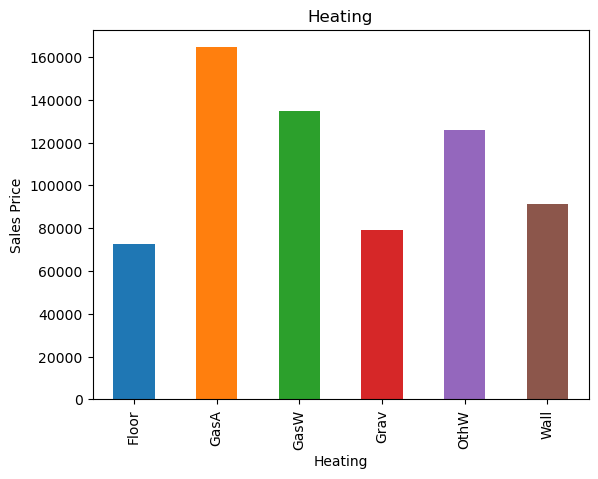

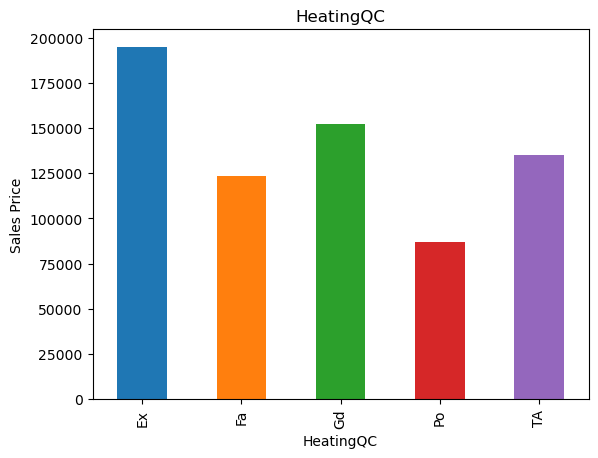

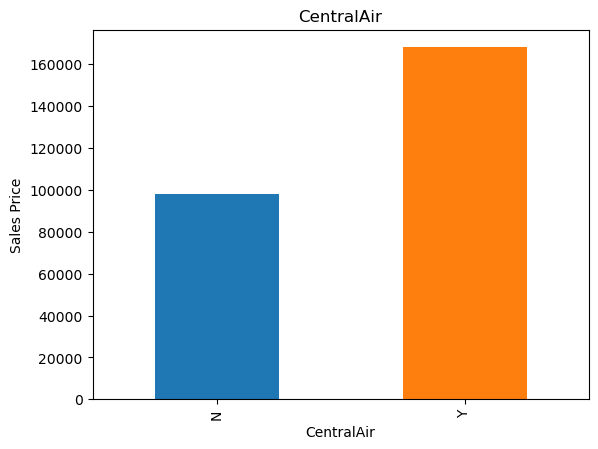

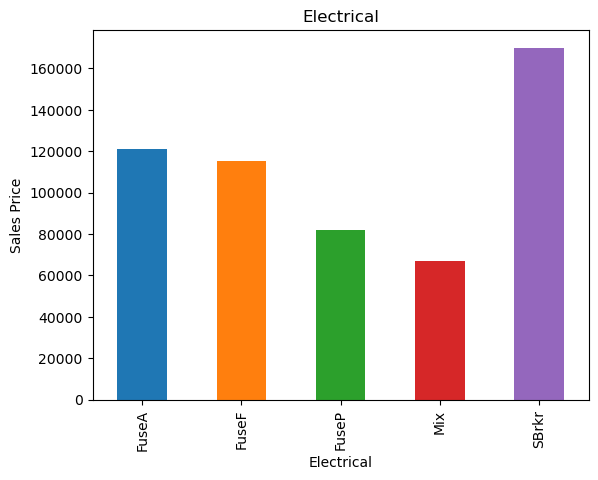

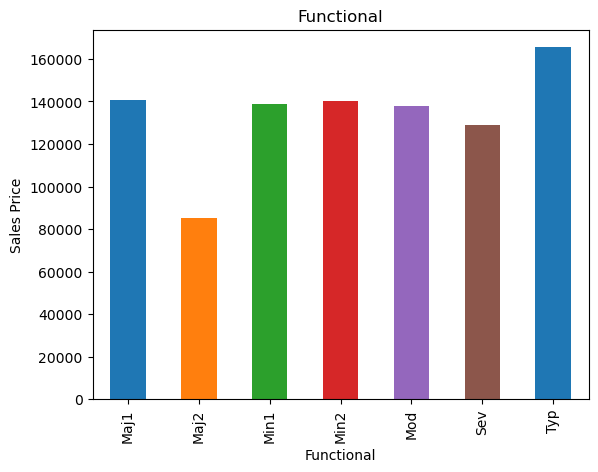

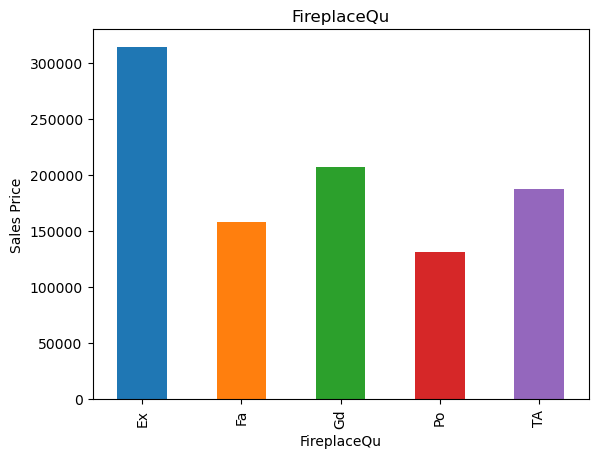

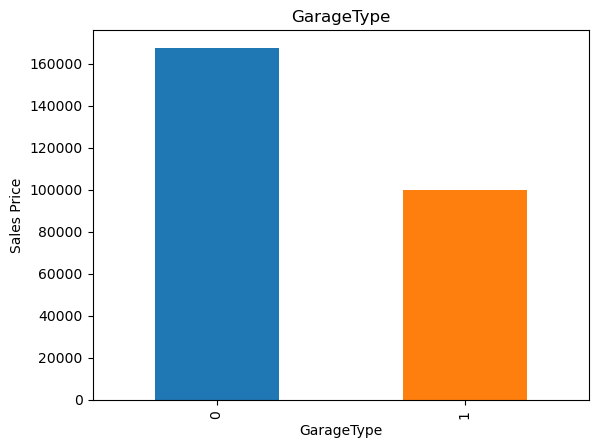

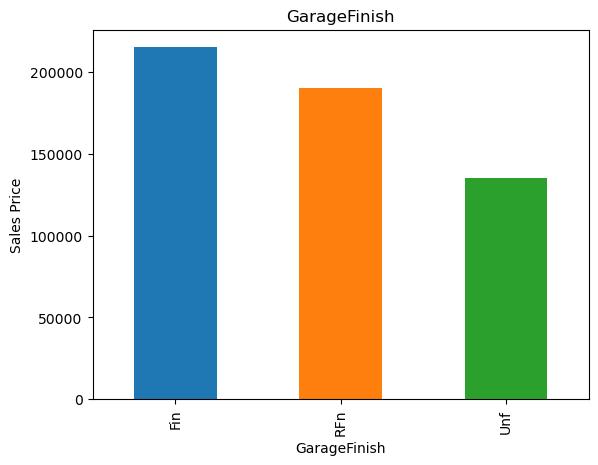

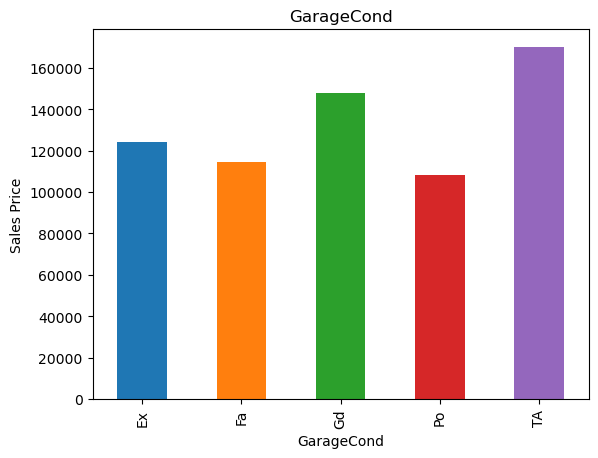

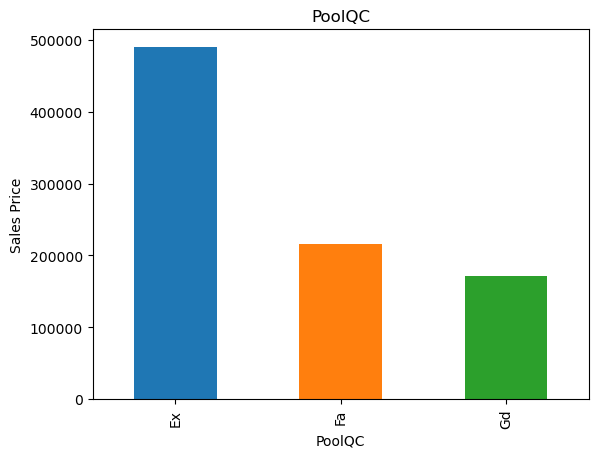

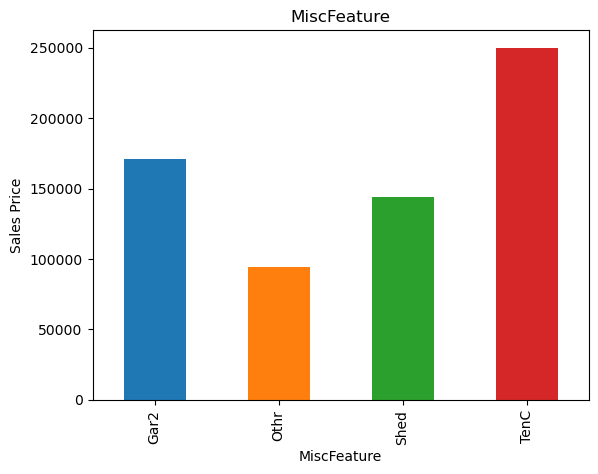

In [243]:
for col in categorical_col:
    df1 = df2.copy()
    df1.groupby(col)['SalePrice'].median().plot.bar(color=plt.cm.tab10(range(len(group_median))))
    plt.ylabel('Sales Price')
    plt.xlabel(col)
    plt.title(col)
    plt.show()

# Feature Engineering

In [254]:
# always split - because of data leakage
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,df['SalePrice'],test_size=0.1,random_state=0)

In [255]:
X_train.shape, X_test.shape

((1314, 81), (146, 81))

In [256]:
y_train.shape, y_test.shape

((1314,), (146,))